<a href="https://colab.research.google.com/github/SubZer0811/ML_preprocessing/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

The directory structure is as follows:


## Description on the directory structure
- `dataset`: This directory contains zip files each containing at most 100 images that are assigned to people for tagging. 
- `tags`: This folder contains tags in .csv format.
- `preprocessed_data`: Since we are using yolo for object detection, the tags need to be converted to a format accepted by yolo. This directory contains zip files that contains tag files along with the images. The images in the zip folder are the same images that are present in `dataset` directory.
- `classes.txt`: This file contains the tags present in the dataset.



# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Some path variables to make the code more readable

## Description on the directory structure

### DRIVE_PATH 
`DRIVE_PATH` is the path in the drive folder that contains the following files in the following structure:

```
├── classes.txt
├── dataset
│   └── 1.zip
│       └── 1.jpg
│       └── 2.jpg
│       └── 3.jpg
│       └── ....
│       └── 1.txt
│       └── 2.txt
│       └── 3.txt
│       └── ....
├── preprocessed_data
│   └── 1.zip
└── tags
    └── 1.csv
```
- `dataset`: This directory contains zip files each containing at most 100 images that are assigned to people for tagging. 
- `tags`: This folder contains tags in .csv format.
- `preprocessed_data`: Since we are using yolo for object detection, the tags need to be converted to a format accepted by yolo. This directory contains zip files that contains tag files along with the images. The images in the zip folder are the same images that are present in `dataset` directory.
- `classes.txt`: This file contains the tags present in the dataset.


In [2]:
WORKING_DIR = "/content/ws/"
DRIVE_PATH = "/content/drive/MyDrive/AUV\ SOCIETY/1-CS/AUV_sim_dataset/"

In [3]:
import os
os.system(f'mkdir {WORKING_DIR}')
os.system(f'cp -r {DRIVE_PATH}* {WORKING_DIR}')
!ls /content/ws/

classes.txt  preprocessed_data	tags		 Training_1.zip
dataset      README.md		trained_weights


# Load classes and colour codes for verifying

The following is a code to map class id to class and vice versa. It also includes a dict to map class id to a colour.

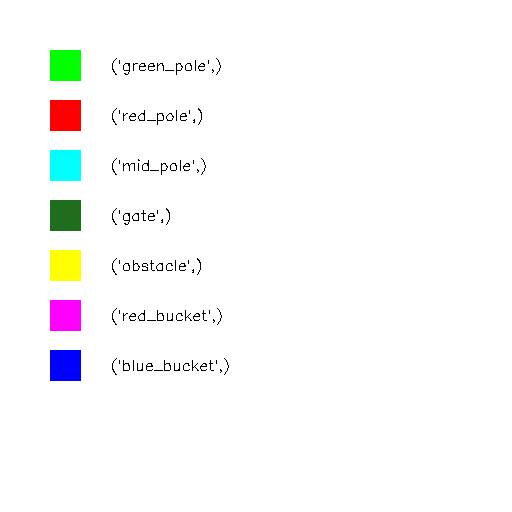

{'green_pole': 0, 'red_pole': 1, 'mid_pole': 2, 'gate': 3, 'obstacle': 4, 'red_bucket': 5, 'blue_bucket': 6}
{0: ('green_pole',), 1: ('red_pole',), 2: ('mid_pole',), 3: ('gate',), 4: ('obstacle',), 5: ('red_bucket',), 6: ('blue_bucket',)}


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

classes_file = open(f'{WORKING_DIR}classes.txt')
class_to_id = {}
id_to_class = {}
class_colours = {
    0: (0, 255, 0),
    1: (0, 0, 255),
    2: (255, 255, 0),
    3: (30, 110, 30),
    4: (0, 255, 255),
    5: (255, 0, 255),
    6: (255, 0, 0),
}


l = classes_file.readline()
count = 0
while l:
    class_to_id[l.strip('\n')] = count
    id_to_class[count] = (l.strip('\n'), )
    count += 1
    l = classes_file.readline()

img_3 = np.zeros([512,512,3],dtype=np.uint8)
img_3.fill(255)

x = 50; y = 50
for id in class_colours:
    cv2.rectangle(img_3, (x, y), (x+30, y+30), class_colours[id], -1)
    cv2.putText(img_3, str(id_to_class[id]), (x+60, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    y += 50

cv2_imshow(img_3)
cv2.imwrite(f"{WORKING_DIR}colour_code.png", img_3)

print(class_to_id)
print(id_to_class)


# Assign dataset number to preprocess

The folder dataset may have multiple datasets (in .zip format). Choose one of them.

In [6]:
NUMBER = 1

# Convert tags from .csv format to yolo format

YOLO uses tags in a different format. The tags in .csv file are as follows:

image,	xmin,	ymin,	xmax,	ymax,	label

YOLO requires 1 file for each image (for example if the image is 1.jpg, a file with 1.txt should hold the tags). The format required by yolo is as follows:

class_id x_center_norm y_center_norm width_norm height_norm

where,<br>
`x_center` = (x-coord-center-of-boundingbox)/IMG_WIDTH <br>
`y_center` = (y-coord-center-of-boundingbox)/IMG_HEIGHT <br>
`width_norm` = (width-of-box)/IMG_WIDTH <br>
`height_norm` = (height-of-box)/IMG_HEIGHT <br>

The following code does the conversion and saves the tag files and images to the following directory: `WORKING_DIR/preprocessed_data/NUMBER/`

In [ ]:
%matplotlib inline
import random
import cv2

def convert(FILE):

    yolof = open(f'{WORKING_DIR}tags/{FILE}', 'r')
    print(f"{WORKING_DIR}tags/{FILE}")
    preprocessed_data = f'{WORKING_DIR}preprocessed_data/{NUMBER}/'
    os.system(f'mkdir {preprocessed_data}')
    testing_set = f'{WORKING_DIR}testing_set/{NUMBER}/'
    os.system(f'mkdir {testing_set}')

    dataset = f'{WORKING_DIR}dataset/'
    os.system(f'unzip -j {dataset}{NUMBER}.zip -d {dataset}{NUMBER}')
    dataset = dataset + str(NUMBER) + '/'

    j = 1
    TEST_TOTAL = 5
    test_count = 0

    line = yolof.readline()
    line = yolof.readline()

    while (line != ''):

        spl = line.strip('\n').split(sep=',')
        
        img_name = spl[0].strip('"')
        img_path = dataset + img_name
        print(img_path)
        img = cv2.imread(img_path)
        
        # if random.randrange(1000)%99 == 0 and test_count < TEST_TOTAL:
        #     filename = testing_set + img_name.split(sep='.')[0] + ".txt"
        #     os.system(f'cp {img_path} {testing_set}')

        # else:
        #     filename = training_set + img_name.split(sep='.')[0] + ".txt"
        #     os.system(f'cp {img_path} {training_set}')

        filename = preprocessed_data + img_name.split(sep='.')[0] + ".txt"
        os.system(f'cp {img_path} {preprocessed_data}')

        txtfile = open(filename, 'a')

        text = spl[1:-1]
        text = [float(i) for i in text]

        x = (text[0] + text[2])/2           # center of box
        y = (text[1] + text[3])/2           # center of box
        w = text[2] - text[0]               # width of box
        h = text[3] - text[1]               # height of box

        class_ = spl[-1].strip('"\n')

        dncoords = ''
        dncoords += str(class_to_id[class_]) + ' '
        dncoords += str(x/img.shape[1]) + ' '
        dncoords += str(y/img.shape[0]) + ' '
        dncoords += str(w/img.shape[1]) + ' '
        dncoords += str(h/img.shape[0]) + '\n'

        txtfile.writelines(dncoords)

        line = yolof.readline()
        j+=1

convert(f"{NUMBER}.csv")

# Check if all images are annotated correctly

The following code can be used to check whether the images are tagged properly.

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output 

def show(img_path):

    print(img_path)
    img = cv2.imread(img_path)
    f = open(img_path.split('.')[0] + ".txt")
    dh, dw, _ = img.shape

    line = f.readline()

    while line:

        class_id, x, y, w, h = map(float, line.split(' '))
        
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), class_colours[class_id], 2)
        cv2.putText(img, img_path.split('/')[-1], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        line = f.readline()
    f.close()

    cv2_imshow(img)
    cv2.waitKey()

# imgs = os.listdir(f'{WORKING_DIR}testing_set/{NUMBER}')

# for x in imgs:
#     if x.endswith('.jpg'):
#         show(f'{WORKING_DIR}testing_set/{NUMBER}/{x}')
#         # cv2.waitKey()
#         # clear_output()


imgs = os.listdir(f'{WORKING_DIR}preprocessed_data/{NUMBER}')

for x in imgs:
    if x.endswith('.jpg'):
        show(f'{WORKING_DIR}preprocessed_data/{NUMBER}/{x}')
        # clear_output()

# Save converted tags along with images to cloud

This following code zips the dataset `NUMBER` (which contains both yolo tag files and images) and saves it in `DRIVE_PATH/preprocessed_data/` as a .zip file.

In [ ]:
os.system(f'cd {WORKING_DIR}preprocessed_data/; zip -r -D {DRIVE_PATH}/preprocessed_data/{NUMBER}.zip {NUMBER}')

# Generate file structure for training with darknet

Once enough images have been tagged and converted, the following blocks can be run. 

So till now, you must have multiple .zip files each containing tags and images in preprocessed_data folder.

You must have the following files/directories for training using darknet:

Training_[ ] contains the following directory structure: 

```
.
├── cfg
├── classes.txt
├── detector.data
├── images
│       └── 1.jpg
│       └── 1.txt
│       └── 2.jpg
│       └── 2.txt
│       └── 3.jpg
│       └── 3.txt
│       └── ....
├── test.txt
├── train.txt
├── valid.txt
└── weights

```
- `images`: This folder contains all images along with tag files for each image.
- `cfg`: This folder should contain the configuration file for training on darknet. This folder might not contain any configuration file in which case, you may need to create one.
- `weights`: This folder contains the weights that may have been obtained from training.
- `train.txt`: This file contains the path to images in training set.
- `test.txt`: This file contains the path to images in testing set.
- `valid.txt`: This file contains the path to images in validation set.
- `classes.txt`: This file contains the tags present in the dataset.
- `detector.data`: This file contains the path to the above mentioned directories and files for darknet.


The following will be the name of the folder containing the abovev mentioned files and folders.

In [ ]:
FOLDER_NAME = "Training_1/"

In [ ]:
os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}weights")
os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}images")
os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}cfg")

`to_be_unzipped`: This list contains the names of .zip files that contain images and tags that needs to be used for training.

Here we have used a 80:10:10 ratio for the training:validation:testing sets.

In [ ]:
import random

to_be_unzipped = [1, 2, 3, 4, 5, 6, 7]

os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}tmp")

for id in to_be_unzipped:
    os.system(f'unzip -j {WORKING_DIR}preprocessed_data/{id}.zip -d {WORKING_DIR}Training_1/images')

list_dir = os.listdir(f'{WORKING_DIR}Training_1/images')
imgs = []
org_imgs = []
train = []
valid = []
test = []

for x in list_dir:
    if x.endswith('.jpg'):
        imgs.append(x)

org_imgs = imgs.copy()
len_train = int(0.8 * len(imgs))
len_valid = int(0.1 * len(imgs))
len_test = len(imgs) - len_train - len_valid

print(f"TOTAL: {len(imgs)}")
print(f'len_train: {len_train}')
print(f'len_valid: {len_valid}')
print(f'len_test: {len_test}')

for i in range(len_train):
    id = random.randint(0, len(imgs)-1)
    train.append(imgs[id])
    imgs.remove(imgs[id])

for i in range(len_test):
    id = random.randint(0, len(imgs)-1)
    test.append(imgs[id])
    imgs.remove(imgs[id])

valid = imgs

print(f'\nlen_train: {len(train)}')
print(f'len_valid: {len(valid)}')
print(f'len_test: {len(test)}')

# VERIFY IF SETS ARE MUTUALLY EXCLUSIVE
temp = test + train + valid
temp.sort()
org_imgs.sort()
print(temp)
print(org_imgs)

if org_imgs == temp:
    print("MUTUALLY EXCLUSIVE")

    train_file = open(f'{WORKING_DIR}{FOLDER_NAME}train.txt', 'w')
    for i in train:
        train_file.write(f'images/{i}\n')
    train_file.close()

    test_file = open(f'{WORKING_DIR}{FOLDER_NAME}test.txt', 'w')
    for i in test:
        test_file.write(f'images/{i}\n')
    test_file.close()

    valid_file = open(f'{WORKING_DIR}{FOLDER_NAME}valid.txt', 'w')
    for i in valid:
        valid_file.write(f'images/{i}\n')
    valid_file.close()

else:
    print("ERROR")



In [ ]:
os.system(f"cp {WORKING_DIR}classes.txt {WORKING_DIR}{FOLDER_NAME}")

FINALLY This command zips the training directory and saves it on google drive.

In [ ]:
os.system(f'cd {WORKING_DIR}; zip -r {DRIVE_PATH}{FOLDER_NAME[:-1]}.zip {FOLDER_NAME}*')

# REVERT

THIS CAN BE USED TO RESET THE WORKING DIRECTORY. DO NOT COPY ANYTHING TO DRIVE WITHOUT VERIFYING.

IF AT ALL SOMETHING SCREWED UP IN THE COLAB WORKING_DIR, YOU CAN ALWAYS RUN THE FOLLOWING BLOCK TO RESET. 

ONCE RESET, GO BACK TO THE CELL THAT DEFINES THE PATHS AND RUN FORM THERE.

In [ ]:
os.system(f'rm -r {WORKING_DIR}')